### Import libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [5]:
# To ensure that the graphs I create are displayed in my notebook without the need to "call" them specifically.

%matplotlib inline

### Import the dataset - 'df_merged2.csv'

In [6]:
df = pd.read_csv(r'C:\Myra\CareerFoundry\Data Immersion\Achievment 6\df_merged2.csv', index_col = False)

#### Removing categorical variables from the dataframe

In [7]:
df.columns

Index(['incident_id', 'month', 'year', 'state', 'male_count', 'female_count',
       'unknown_gender', 'child_0-11', 'teen_12-17', 'adult_18+',
       'unknown_age_group', 'arrested', 'injured', 'killed', 'unharmed',
       'unknown_status', 'suspect', 'victim', 'unknown_type', 'latitude',
       'longitude', 'incident_url', 'source_url', 'sources',
       'state_house_district', 'state_senate_district'],
      dtype='object')

In [8]:
df.dtypes

incident_id                int64
month                     object
year                       int64
state                     object
male_count                 int64
female_count               int64
unknown_gender             int64
child_0-11                 int64
teen_12-17                 int64
adult_18+                  int64
unknown_age_group          int64
arrested                   int64
injured                    int64
killed                     int64
unharmed                   int64
unknown_status             int64
suspect                    int64
victim                     int64
unknown_type               int64
latitude                 float64
longitude                float64
incident_url              object
source_url                object
sources                   object
state_house_district     float64
state_senate_district    float64
dtype: object

In [9]:
df_2 = df[['male_count', 'female_count', 'unknown_gender', 'child_0-11', 'teen_12-17', 'adult_18+',
       'unknown_age_group', 'arrested', 'injured', 'killed', 'unharmed',
       'unknown_status', 'suspect', 'victim', 'unknown_type']]

In [10]:
df_2.head()

,male_count,female_count,unknown_gender,child_0-11,teen_12-17,adult_18+,unknown_age_group,arrested,injured,killed,unharmed,unknown_status,suspect,victim,unknown_type
0,3,1,1,0,0,5,0,1,4,0,0,0,1,4,0
1,1,0,4,0,0,4,1,0,3,1,0,1,1,4,0
2,5,0,0,0,0,5,0,2,3,1,2,0,2,3,0
3,3,1,0,0,0,4,0,0,0,4,0,0,1,3,0
4,2,2,0,0,1,3,0,0,2,2,0,0,1,3,0


In [11]:
# Checking for null values in df_2
print(df_2.isnull().sum())

male_count           0
female_count         0
unknown_gender       0
child_0-11           0
teen_12-17           0
adult_18+            0
unknown_age_group    0
arrested             0
injured              0
killed               0
unharmed             0
unknown_status       0
suspect              0
victim               0
unknown_type         0
dtype: int64


In [12]:
df_2['unknown_type'].min()

0

In [13]:
df_2['unknown_type'].max()

0

In [14]:
# Since in 'unknown_type' there's only 0, I will delete this column because it is not needed for our analysis
df_2 = df_2.drop('unknown_type', axis=1)

In [15]:
df_2.head()

,male_count,female_count,unknown_gender,child_0-11,teen_12-17,adult_18+,unknown_age_group,arrested,injured,killed,unharmed,unknown_status,suspect,victim
0,3,1,1,0,0,5,0,1,4,0,0,0,1,4
1,1,0,4,0,0,4,1,0,3,1,0,1,1,4
2,5,0,0,0,0,5,0,2,3,1,2,0,2,3
3,3,1,0,0,0,4,0,0,0,4,0,0,1,3
4,2,2,0,0,1,3,0,0,2,2,0,0,1,3


In [16]:
df_2.shape

(239677, 14)

### Standardizing the dataframe 'df_2'

In [17]:
df_standard = pd.DataFrame()

In [18]:
# Using loop to iterate over each column and perform the normalization operation
for column in df_2.columns:
    df_standard[column] = (df_2[column] - df_2[column].mean()) / df_2[column].std()

In [19]:
df_standard.head()

,male_count,female_count,unknown_gender,child_0-11,teen_12-17,adult_18+,unknown_age_group,arrested,injured,killed,unharmed,unknown_status,suspect,victim
0,1.601752,1.788195,1.439280,-0.112304,-0.256492,3.242837,-0.342094,0.719050,4.803237,-0.483572,-0.736798,-0.177534,0.173098,3.803845
1,-0.271220,-0.392865,6.597133,-0.112304,-0.256492,2.371450,1.142410,-0.508931,3.433241,1.432846,-0.736798,3.146752,0.173098,3.803845
2,3.474725,-0.392865,-0.280004,-0.112304,-0.256492,3.242837,-0.342094,1.947031,3.433241,1.432846,1.118342,-0.177534,1.199665,2.613097
3,1.601752,1.788195,-0.280004,-0.112304,-0.256492,2.371450,-0.342094,-0.508931,-0.676747,7.182102,-0.736798,-0.177534,0.173098,2.613097
4,0.665266,3.969255,-0.280004,-0.112304,2.143478,1.500063,-0.342094,-0.508931,2.063245,3.349265,-0.736798,-0.177534,0.173098,2.613097


### Using the Elbow Technique

In [20]:
num_cl = range(1, 50) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
models = [kmeans[i].fit(df_standard) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\si

C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\si

In [27]:
inertia_values = []
for model in kmeans:
    model.fit(df_standard)
    inertia_values.append(model.inertia_)

C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\si

C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Myra Ahsan\anaconda3\lib\si

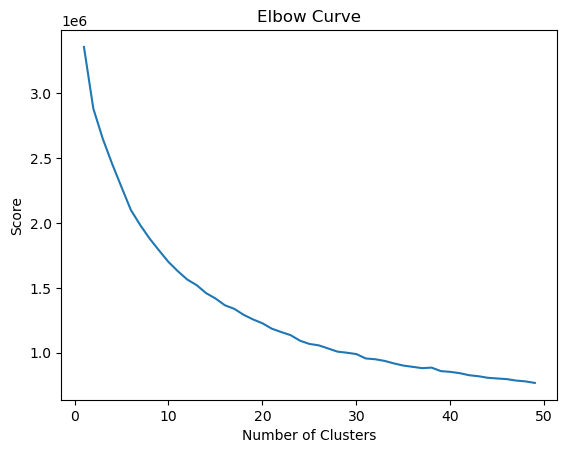

In [28]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,inertia_values
       )
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

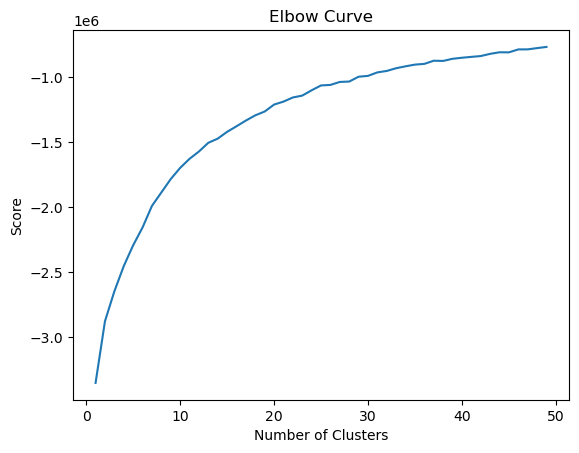

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow, or the breaking point of the curve, is where the curve begins to flatten out. Here, after 22 clusters there is diminishing returns in terms of capturing additional variation.

### K-means clustering

In [44]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 22) 

In [45]:
# Fit the k-means object to the data.

kmeans.fit(df_standard)

C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=22)

In [46]:
df_2['clusters'] = kmeans.fit_predict(df_standard)

C:\Users\Myra Ahsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
df_2.head()

,male_count,female_count,unknown_gender,child_0-11,teen_12-17,adult_18+,unknown_age_group,arrested,injured,killed,unharmed,unknown_status,suspect,victim,clusters
0,3,1,1,0,0,5,0,1,4,0,0,0,1,4,16
1,1,0,4,0,0,4,1,0,3,1,0,1,1,4,9
2,5,0,0,0,0,5,0,2,3,1,2,0,2,3,11
3,3,1,0,0,0,4,0,0,0,4,0,0,1,3,15
4,2,2,0,0,1,3,0,0,2,2,0,0,1,3,15


In [48]:
df_2['clusters'].value_counts()

6     39599
3     35626
13    25527
5     21010
4     20398
1     15252
20    14030
0     11906
15     9521
2      8427
11     7418
18     7048
12     5172
10     4448
9      4398
8      3554
19     2491
7      1991
14     1066
16      747
17       46
21        2
Name: clusters, dtype: int64

#### Plotting the clusters for suspects and people aged over 18+

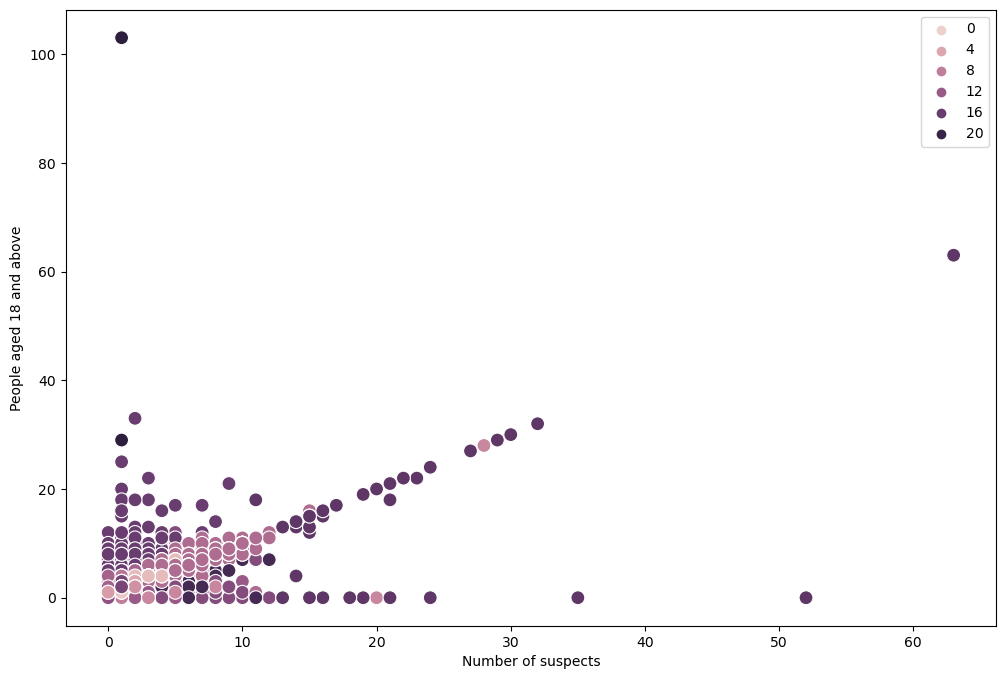

In [49]:
# Plotting the clusters for the "suspects" and "adult_18+" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['suspect'], y=df_2['adult_18+'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of suspects') # Label x-axis.
plt.ylabel('People aged 18 and above') # Label y-axis.
plt.show()

#### Plotting the clusters for male count and people killed in gun violence

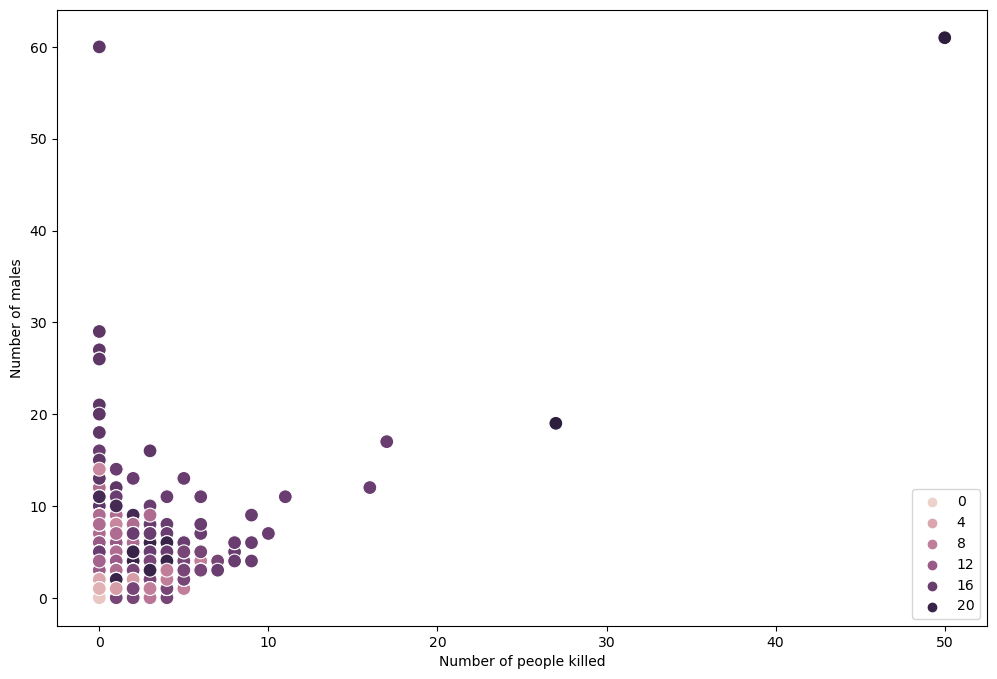

In [50]:
# Plotting the clusters for the "killed" and "male_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['killed'], y=df_2['male_count'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of people killed') # Label x-axis.
plt.ylabel('Number of males') # Label y-axis.
plt.show()

#### Plotting the clusters for female count and people killed in gun violence

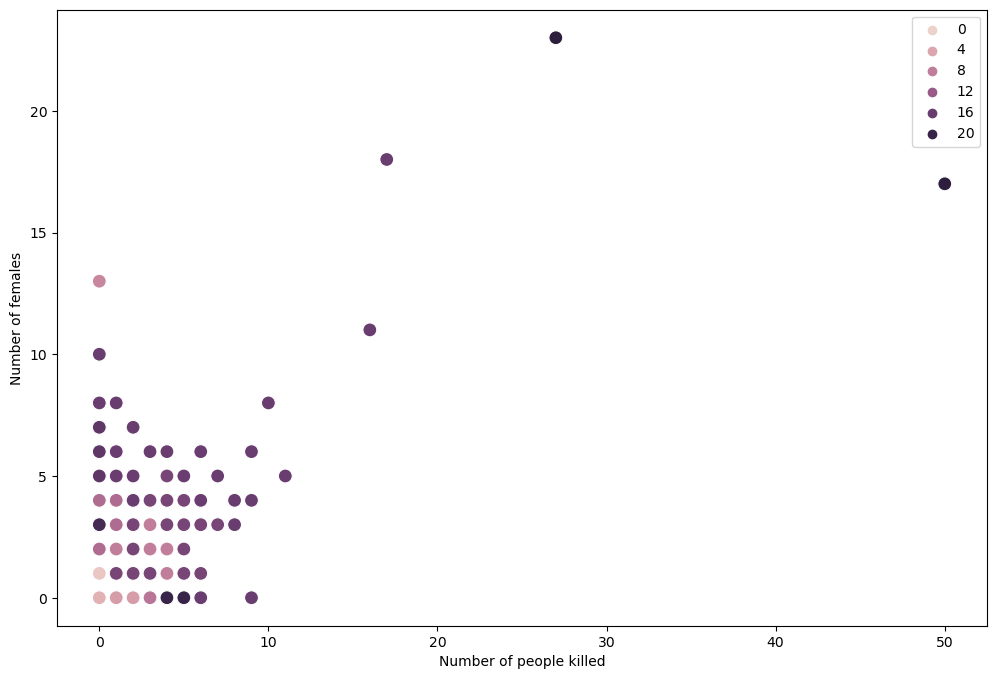

In [51]:
# Plotting the clusters for the "killed" and "female_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['killed'], y=df_2['female_count'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of people killed') # Label x-axis.
plt.ylabel('Number of females') # Label y-axis.
plt.show()

The clusters for the above visuals do not make much sense. This is because the clustering has been done keeping in mind a lot of variables. If the clustering is done with just a few variables, it might make more sense. Some variables became irrelevant for a certain incident. for example, if an incident takes place where only one male victim and one male perpetrator is involved then only a few columns are relevant and in the rest, it would be 0.

### Descriptive analysis for the clusters

In [52]:
df_2.loc[(df_2['clusters'] == 0) | (df_2['clusters'] == 1) | (df_2['clusters'] == 2) | (df_2['clusters'] == 3), 'cluster'] = 'light pink'
df_2.loc[(df_2['clusters'] == 4) | (df_2['clusters'] == 5) | (df_2['clusters'] == 6) | (df_2['clusters'] == 7), 'cluster'] = 'pink'
df_2.loc[(df_2['clusters'] == 8) | (df_2['clusters'] == 9) | (df_2['clusters'] == 10) | (df_2['clusters'] == 11), 'cluster'] = 'light purple'
df_2.loc[(df_2['clusters'] == 12) | (df_2['clusters'] == 13) | (df_2['clusters'] == 14) | (df_2['clusters'] == 15), 'cluster'] = 'purple'
df_2.loc[(df_2['clusters'] == 16) | (df_2['clusters'] == 17) | (df_2['clusters'] == 18) | (df_2['clusters'] == 19), 'cluster'] = 'dark purple'
df_2.loc[df_2['clusters'] == 20, 'cluster'] = 'black'

In [53]:
df_2.head()

,male_count,female_count,unknown_gender,child_0-11,teen_12-17,adult_18+,unknown_age_group,arrested,injured,killed,unharmed,unknown_status,suspect,victim,clusters,cluster
0,3,1,1,0,0,5,0,1,4,0,0,0,1,4,16,dark purple
1,1,0,4,0,0,4,1,0,3,1,0,1,1,4,9,light purple
2,5,0,0,0,0,5,0,2,3,1,2,0,2,3,11,light purple
3,3,1,0,0,0,4,0,0,0,4,0,0,1,3,15,purple
4,2,2,0,0,1,3,0,0,2,2,0,0,1,3,15,purple


In [54]:
df_2.groupby('cluster').agg({'male_count':['mean', 'median'], 
                         'female_count':['mean', 'median'], 
                         'adult_18+':['mean', 'median'],
                          'arrested':['mean', 'median'],
                          'killed':['mean', 'median'],
                          'victim':['mean', 'median']})

male_count        female_count        adult_18+         arrested  \
                   mean median         mean median      mean median      mean   
cluster                                                                         
black          2.219173    2.0     0.000000    0.0  2.160513    2.0  0.669280   
dark purple    1.888115    1.0     0.273035    0.0  1.492257    1.0  0.670538   
light pink     1.186853    1.0     0.288439    0.0  1.252250    1.0  0.223575   
light purple   2.042436    2.0     0.379756    0.0  2.286608    2.0  0.948128   
pink           1.304068    1.0     0.004651    0.0  1.237620    1.0  0.494891   
purple         0.608899    0.0     0.287240    0.0  0.565882    0.0  0.175096   

                       killed           victim         
             median      mean median      mean median  
cluster                                                
black           1.0  1.078475    1.0  1.113828    1.0  
dark purple     0.0  0.197638    0.0  1.280391    1.0  
light pink      0.0  0.047577    0.0  0.961017    1.0  
light purple    0.0  0.224745    0.0  1.684983    2.0  
pink            0.0  0.261067    0.0  0.509615    0.0  
purple          0.0  0.332268    0.0  0.482754    0.0

The k-means clustering model showed little insight in this case because there were many variables involved. It would be better to include categorical variables to understand and gain more insight. Since this was just exploratory analysis, I did not find any pattern in cluster.